<a href="https://colab.research.google.com/github/anyiliusam/test_git/blob/main/slice_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Remove warning
import warnings
warnings.filterwarnings('ignore')

# Download data (just run the first time, then comment)

!git clone https://github.com/neurallatents/nlb_tools.git nlb_tools_git
!pip install dandi
!dandi download https://gui.dandiarchive.org/#/dandiset/000139

# Packages to initialize
from nlb_tools_git.nlb_tools.nwb_interface import NWBDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Cloning into 'nlb_tools_git'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 215 (delta 107), reused 167 (delta 72), pack-reused 0
Receiving objects: 100% (215/215), 4.48 MiB | 18.36 MiB/s, done.
Resolving deltas: 100% (107/107), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 340 kB 5.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 185 kB 69.7 MB/s 
     |████████████████████████████████| 2.3 MB 42.3 MB/s 
     |████████████████████████████████| 118 kB 45.4 MB/s 
     |████████████████████████████████| 51 kB 123 kB/s 
     |████████████████████████████████| 109 kB 41.1 MB/s 
     |████████████████████████████████| 269 kB 58.3 MB/s 
     |████████████████████████████████| 185 kB 48.5 MB/s 
     |████████████████████████████████| 

In [3]:
# Extract dataset
dataset = NWBDataset("./000139/sub-Jenkins/", "*train", split_heldout=False)

In [4]:
#Smoothen data with Gaussian filter
dataset.smooth_spk(50, name='smth_50')

In [6]:
def 

In [6]:
# Loop over trials to build tensor
trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450),ignored_trials=dataset.trial_info['trial_version']!=0)
rates = []
pos   = []
ChosenratesInd = []
trial_ids = trial_data.set_index(['trial_id']).index.unique().tolist()
for n_trial in trial_ids:
  temp_trial = trial_data.loc[trial_data['trial_id'] == n_trial]
  pos  += [temp_trial['cursor_pos'].to_numpy()]
  rates+=[temp_trial[['spikes_smth_50']].to_numpy()]
  ChosenratesInd+=[temp_trial[['trial_id']].to_numpy()]
pos   = np.array(pos)   #Gets hand positions as array (Trials, Times, Neurons)
rates = np.array(rates) #Transform into an array (Trials, Times, Neurons) (0,1,2)
trialInd = np.unique(ChosenratesInd)

# classify by the trial types, group the trial ID into their corr groups
trial_types =np.unique(dataset.trial_info['trial_type'])
indices ={} # a dict, key is teh trial types and teh values are teh trail IDs
all_types = list(dataset.trial_info['trial_type'])
sub_types = [all_types[i] for i in trialInd]
for i in range(len(trial_types)):
  
  indices[trial_types[i]]=[index for index, element in enumerate(sub_types) if element == trial_types[i]]

# a 9 by 9 dict, 9 different trial types and 9 trials each condictions

(0.33124842499842483, 0.0, 1.0, 1.0)
(1.0, 0.5095593330887448, 0.0, 1.0)
(0.0, 1.0, 0.47830868224339584, 1.0)
(1.0, 0.5790446966917554, 0.0, 1.0)
(1.0, 0.5095593330887448, 0.0, 1.0)
(1.0, 0.0, 0.6959564845594255, 1.0)
(1.0, 0.5790446966917554, 0.0, 1.0)
(1.0, 0.5790446966917554, 0.0, 1.0)
(1.0, 0.5790446966917554, 0.0, 1.0)


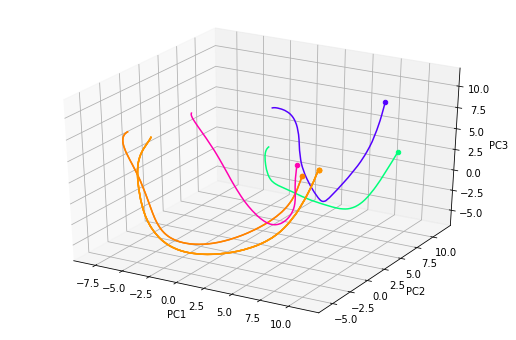

In [38]:
# Plotting the 9 trial types as teh averaged traces, 
# Seed generator for consistent plots
np.random.seed(2021)
colors = []
ratesdemo =[]
n_conds =len(trial_types)
for i in np.random.choice(len(trial_types), len(trial_types)):
    cond = trial_types[i]
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type']] == cond, axis=1)
    # Extract trial data
    trial_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-50, 450), ignored_trials=(~mask))
    # Append averaged smoothed spikes for condition
    ratesdemo.append(trial_data.groupby('align_time')[trial_data[['spikes_smth_50']].columns].mean().to_numpy())
    # Append reach angle-based color for condition
    active_target = dataset.trial_info[mask].target_pos.iloc[0][dataset.trial_info[mask].active_target.iloc[0]]
    reach_angle = np.arctan2(*active_target[::-1])
    colors.append(plt.cm.hsv(reach_angle / (2*np.pi) + 0.5)) #simialr reach angels have simialr colours 
  # Stack data and apply PCA
rate_stack = np.vstack(ratesdemo) # in neural space, t by k where k = 9 different condictions 
rate_scaled = StandardScaler().fit_transform(rate_stack)
pca = PCA(n_components=3)
traj_stack = pca.fit_transform(rate_scaled)
traj_arr = traj_stack.reshape((n_conds, 500, -1))

# Loop through trajectories and plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for traj, col in zip(traj_arr, colors):
    print(col)
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], color=col)
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2], color=col) 

# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

500

In [8]:
# Transform it into N x Times - concatenate it
# Transform it into N x Times - concatenate it

rates_swaped=np.swapaxes(rates,2,0) #first we switch the dimensions: N -in position 2 - goes to the position 0

rates_swaped2=np.swapaxes(rates_swaped,1,2) #then we move Times to the last dimension of rates_swaped

N_KT=np.reshape(rates_swaped2, (rates_swaped2.shape[0],rates_swaped2.shape[1]*rates_swaped2.shape[2])) #now we can finally reshape the matrix into 2D - we want to keep the first dimension to be the number of neurons (dimension in 0)
#the second dimesion will be a multiplication of the 1 [Trials] and 2 [Times] dimension in the 3D array

#N_times is N x [500 (times) 250 (trials)] 
#trial-concatenated MATRIX

# Transform it into Times x [N X Trials] - concatenate it
#500 (times) x [152(neurons) 250(trials)]
rates_swaped3=np.swapaxes(rates,1,0) #times goes to the first position
T_NK=np.reshape(rates_swaped3, (rates_swaped3.shape[0],rates_swaped3.shape[1]*rates_swaped3.shape[2])) #2D matrix with Times x [all the neurons at each trial concatenated - 152(t1) 152(t2)]

# Transform it into Trials x [N X Times] - concatenate it
K_NT= np.reshape(rates, (rates.shape[0],rates.shape[1]*rates.shape[2])) #2D matrix with Trials x [all the neurons at each time point concatenated - 152(time1) 152(time2)]



<function matplotlib.pyplot.show>

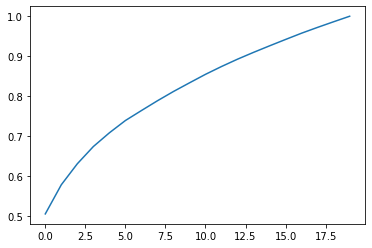

In [200]:
# DO PCA in all
#subtract the mean
N_KT_sub_mean=N_KT - np.mean(N_KT,axis=0) 

#compute the covariance matrix
cov_matrix= np.cov(N_KT_sub_mean)

eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 10 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),N_KT_sub_mean).transpose()

#compute variance explained
total_egnvalues = sum(eigen_values)
var_exp = [(i/total_egnvalues) for i in sorted(eigen_values, reverse=True)]

#cum_sum_exp = np.cumsum(var_exp)
#plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal component index')
#plt.legend(loc='best')
#plt.tight_layout()
#plt.show()

# check if it matches using the default function
pca = PCA(n_components=20)
principalComponents = pca.fit(N_KT)
c_N_KT=np.array(pca.explained_variance_ratio_)
plt.plot(np.cumsum(c_N_KT)/np.sum(c_N_KT))
plt.show

In [71]:
from matplotlib.font_manager import MSUserFontDirectories
## inswrt here the code that compute the mse as a function of the n components, then decide how many components to use 
N_KT_sub_mean = N_KT - np.mean(N_KT,axis=0) 
T_NK_sub_mean = T_NK - np.mean(T_NK,axis=0) 
K_NT_sub_mean = K_NT - np.mean(K_NT,axis=0) 
mseN = []
mseK = []
mseT = []
projN =[]
projT = []
projK = []
MSUserFontDirectories =[]
for i in range(0,82):
  pca = PCA(n_components=i)
  projN = pca.inverse_transform(pca.fit_transform(N_KT))
  projT = pca.inverse_transform(pca.fit_transform(T_NK))
  projK = pca.inverse_transform(pca.fit_transform(K_NT))
  diffN = np.subtract(N_KT_sub_mean,projN)
  diffK = np.subtract(K_NT_sub_mean,projK)
  diffT = np.subtract(T_NK_sub_mean,projT)
  mseN+=[np.mean(diffN**2)]
  mseT+=[np.mean(diffT**2)]
  mseK+=[np.mean(diffK**2)]
a=np.mean(N_KT_sub_mean**2) #the normaliseing factor 
b=np.mean(T_NK_sub_mean**2) #the normaliseing factor 
c=np.mean(K_NT_sub_mean**2) #the normaliseing factor 



<function matplotlib.pyplot.show>

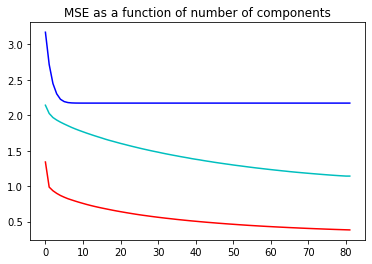

In [72]:
plt.plot(mseN/a,'r')
plt.plot(mseT/b,'b')
plt.plot(mseK/c,'c')
#plt.plot(mseT,'b')
#plt.plot(mseK,'c')
plt.title('MSE as a function of number of components')
plt.show

In [42]:
a

4.1212798255069716e-05

Do PCA to each slice, with all the components, then reshape the time and trial slices into neuron format, do a PCA on those three reshaped, denoised data, and try to relate teh pcs from each slice to the behavioural varaibles


In [9]:
## using the full rank PCA for each slice to decide the n, then using the python package to get teh reduced sized, reconstructed data

MES_level = .25

pca = PCA(n_components=2)
Npcs = pca.fit_transform(N_KT)
new_N_KT = pca.inverse_transform(Npcs)


pca = PCA(n_components=1)
Tpcs = pca.fit_transform(T_NK)
new_T_NK = pca.inverse_transform(Tpcs)

pca = PCA(n_components=1)
Kpcs = pca.fit_transform(K_NT)
new_K_NT = pca.inverse_transform(Kpcs)



In [ ]:
# colour code tehe trajectories 


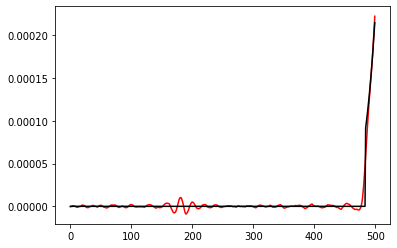

In [256]:

plt.plot(new_T_NK[:,1],'r')
plt.plot(T_NK[:,1],'k')
plt.show()

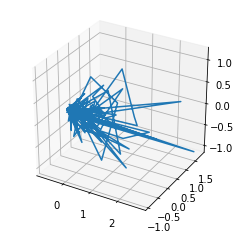

In [250]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = Npcs[:,0]
y = Npcs[:,1]
z = Npcs[:,2]
ax.plot(x,y,z)
plt.show()

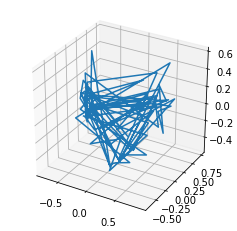

In [249]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = Kpcs[:,0]
y = Kpcs[:,1]
z = Kpcs[:,2]
ax.plot(x,y,z)
plt.show()

In [10]:
# now reshape the two slices into n kt, first convert into a 3D, then to 2D 
reshape_N_KT = new_N_KT # no need to reshape 

## SIZE IS HARD CODED BE CAREFUL 
D_K_NT = np.reshape(new_K_NT,[81,500,152]) ##FOR SOME REASON TEH 2ND AND TEH 3RD DIM NEEDS TRO BE SWAPPED
DD_K_NT = np.swapaxes(D_K_NT,2,0)
DDD_K_NT = np.swapaxes(DD_K_NT,2,1)## should be 162 by 165 by 500
reshape_K_NT = np.reshape(DDD_K_NT,[152,reshape_N_KT.shape[1]]) # reshape into N_KT format ie neuron by trial*time



In [11]:
D_T_NK = np.reshape(new_T_NK,[500,81,152])
DD_T_NK = np.swapaxes(D_T_NK,2,0)# should be 152,165,500
#DDD_T_NK = np.swapaxes(DD_T_NK,2,1)## should be 162 by 165 by 500
reshape_T_NK = np.reshape(DD_T_NK,[152,reshape_N_KT.shape[1]]) 


In [270]:

#D_T_NK[0,0,:]
#len(reshape_T_NK[:,0])
#print(len(new_T_NK[0,0:152]))

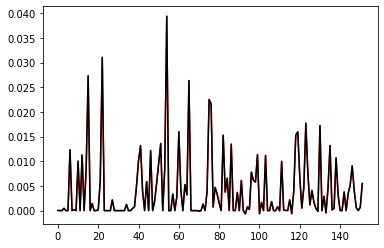

In [90]:
## quality control to check for if reshaping worked well in teh previous step, teh two lines should match each other 
#print(reshape_T_NK[:,0])
#print(new_T_NK[0,0:162]) # check for all n teh first trial teh firt tim epoint
plt.plot(reshape_T_NK[:,0],'r')
plt.plot(new_T_NK[0,0:152],'k')
plt.show()
#reshape_K_NT[:,0]
#new_K_NT [0,0:162]

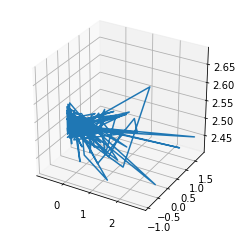

In [69]:
# do PCA on the three neuron slices 

#from scipy.sparse.linalg.eigen.arpack.arpack import ZNEUPD_ERRORS
#from mpl_toolkits.mplot3d import Axes3D
#neuron PC
pca = PCA(n_components=3)
N_pc = pca.fit_transform(reshape_N_KT)
#X_new = pca.inverse_transform(principalComponents)
#X_new = pca.inverse_transform(principalComponents)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = N_pc[:,0]
y = N_pc[:,1]
z = N_pc[:,2]
ax.plot(x,y,z)
plt.show()


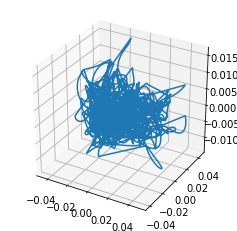

In [70]:
N_pc = pca.fit_transform(np.transpose(reshape_N_KT))
#X_new = pca.inverse_transform(principalComponents)
#X_new = pca.inverse_transform(principalComponents)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = N_pc[:,0]
y = N_pc[:,1]
z = N_pc[:,2]
ax.plot(x,y,z)
plt.show()
    

In [151]:
#putting the same conditions together ################################
condKey = list(indices.keys())
n_conds =len(trial_types)
del this_tchunck
all_tchuncks =np.zeros((len(trial_types),(n_conds+1)*T_NK.shape[0],3))
# first put all the time chuncks that share teh conditions into one 
for i in range(len(trial_types)):
    cond = trial_types[i]    
    this_index = indices[condKey[i]]
    this_tchunck =np.zeros(((n_conds+1)*T_NK.shape[0],3))
    for t in range(len(this_index)):
      try:
        this_tchunck[t*T_NK.shape[0]:(t+1)*T_NK.shape[0],:]=N_pc[T_NK.shape[0]*(this_index[t]-1):(T_NK.shape[0]*(this_index[t]-1)+T_NK.shape[0]),:]
      except: # when teh index is actuall 0 
        this_tchunck[t*T_NK.shape[0]:(t+1)*T_NK.shape[0],:] = N_pc[0:500,:]
    all_tchuncks[i,:,:] = (this_tchunck)# a n condition by timextrial by n pc 


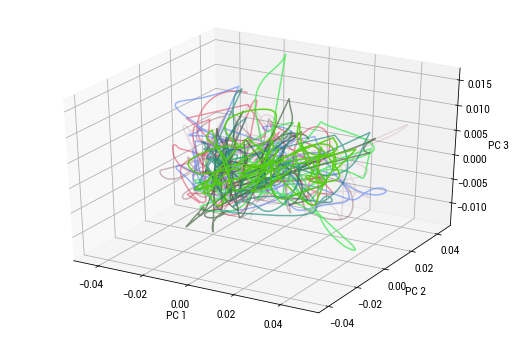

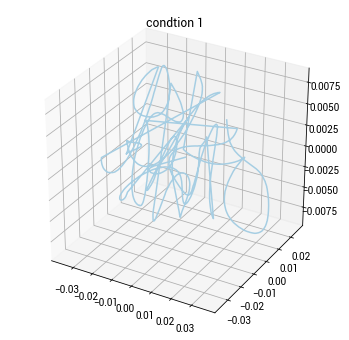

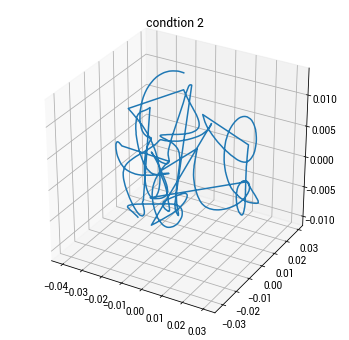

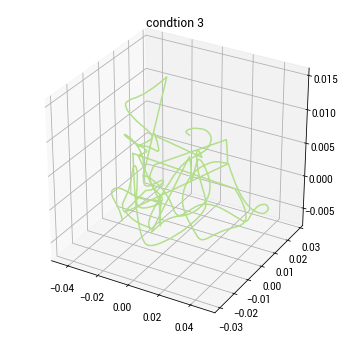

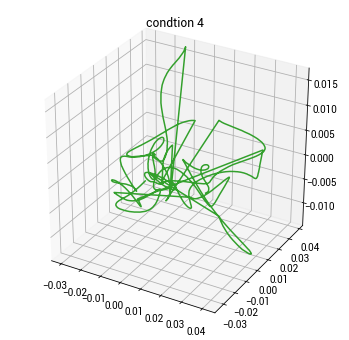

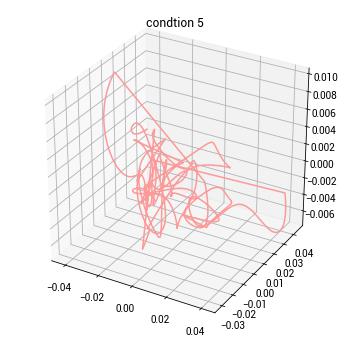

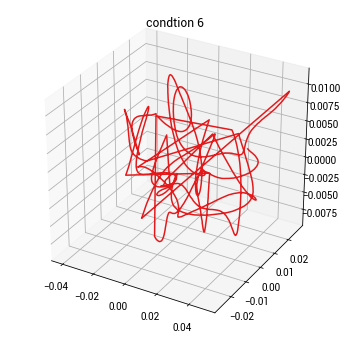

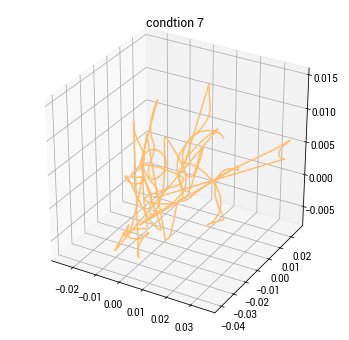

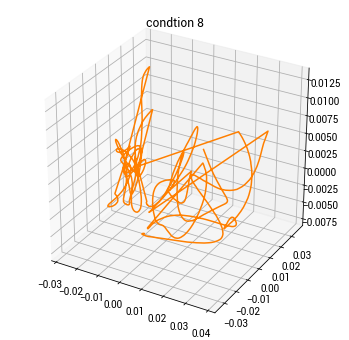

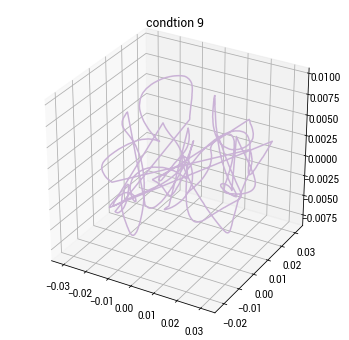

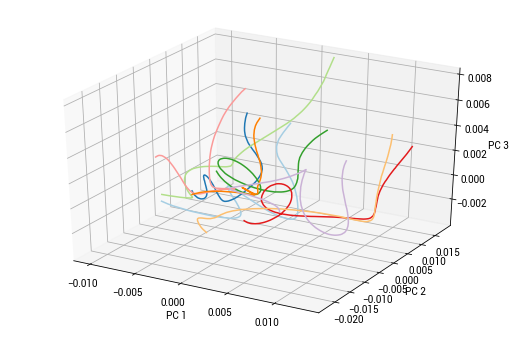

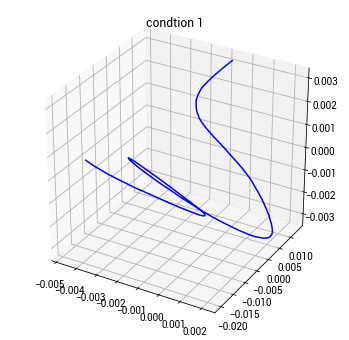

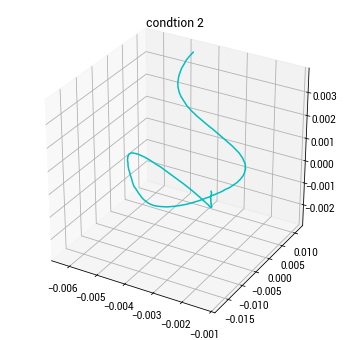

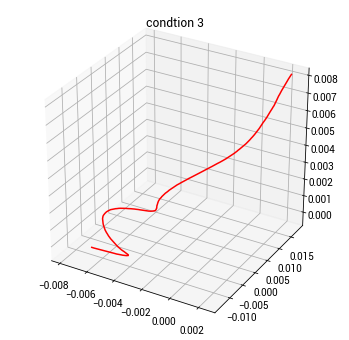

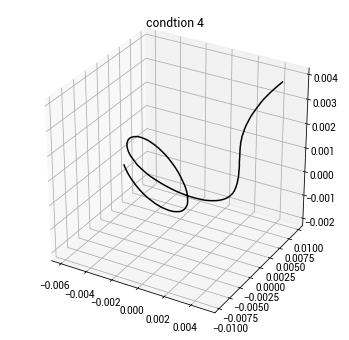

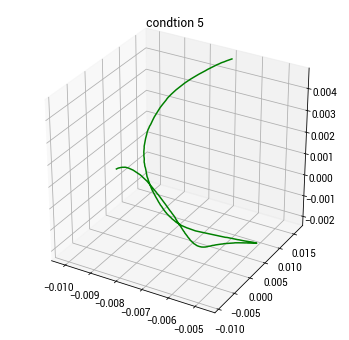

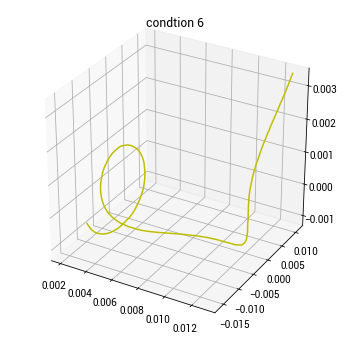

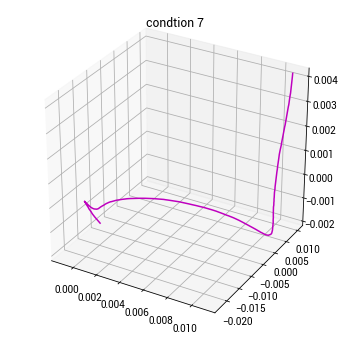

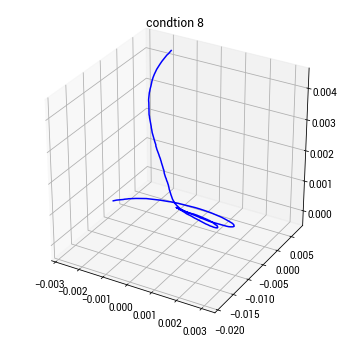

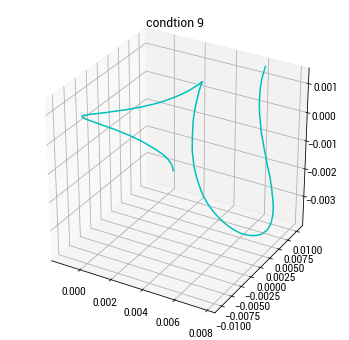

In [177]:
# time slice 

TchuncksDemo = ShowTracesbyCond(reshape_N_KT,T_NK,10,trial_types,indices)

In [172]:
def ShowTracesbyCond(reshape_K_NT,T_NK,n_components,trial_types,indices):
  #K_pc, the folded unfolded 2d matrix, then transpose so KTbyN, then do pca on it to have npc by KT
  #trial_types =np.unique(dataset.trial_info['trial_type']) indices a dict that strore trial types: trial indecies 
  #putting the same conditions together ################################
  K_pc = pca.fit_transform(np.transpose(reshape_K_NT))
  condKey = list(indices.keys())
  n_conds =len(trial_types)
  all_tchuncks =np.zeros((len(trial_types),(n_conds+1)*T_NK.shape[0],n_components))
  # first put all the time chuncks that share teh conditions into one 
  for i in range(len(trial_types)):
      cond = trial_types[i]    
      this_index = indices[condKey[i]]
      this_tchunck =np.zeros(((n_conds+1)*T_NK.shape[0],n_components))
      for t in range(len(this_index)):
        try:
          this_tchunck[t*T_NK.shape[0]:(t+1)*T_NK.shape[0],:]=K_pc[T_NK.shape[0]*(this_index[t]-1):(T_NK.shape[0]*(this_index[t]-1)+T_NK.shape[0]),:]
        except: # when teh index is actuall 0 
          this_tchunck[t*T_NK.shape[0]:(t+1)*T_NK.shape[0],:] = K_pc[0:T_NK.shape[0],:]
      all_tchuncks[i,:,:] = (this_tchunck)# a n condition by timextrial by n pc 
  all_tchuncks=all_tchuncks[:,0:(all_tchuncks.shape[1]-T_NK.shape[0]),:]
  colours = np.random.rand(n_conds,4)
  #plotting all conditions, no average 
  fig = plt.figure(figsize=(9,6))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('PC 1')
  ax.set_ylabel('PC 2')
  ax.set_zlabel('PC 3')
  # Loop through trajectories and plot
  for TbyCond, col in zip(all_tchuncks, colours):
      ax.plot(TbyCond[:, 0], TbyCond[:, 1], TbyCond[:, 2], color=col)
  colours = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#FFFF99']
  # plotting each cond seperately 
  # Loop through trajectories and plot
  for i, (TbyCond, col) in enumerate(zip(all_tchuncks, colours)):
      fig = plt.figure(figsize=(6,6))
      ax = fig.add_subplot(111, projection='3d')
      ax.plot(TbyCond[:, 0], TbyCond[:, 1], TbyCond[:, 2], color=col)
      plt.title('condtion %d' % (i+1))
      plt.show()
  # plotting the averaged traces across trials to tidy up
  reshape_tchuncks = np.reshape(all_tchuncks,[n_conds,n_conds,T_NK.shape[0],n_components])
  mean_tchuncks = np.mean(reshape_tchuncks,axis= 0)

   #plotting all conditions, AVERAGED 
  fig = plt.figure(figsize=(9,6))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('PC 1')
  ax.set_ylabel('PC 2')
  ax.set_zlabel('PC 3')
  # Loop through trajectories and plot
  for TbyCond, col in zip(mean_tchuncks, colours):
      ax.plot(TbyCond[:, 0], TbyCond[:, 1], TbyCond[:, 2], color=col)
  colours = ['b','c','r','k','g','y','m','b','c']
  # plotting each cond seperately 
  # Loop through trajectories and plot
  for i, (TbyCond, col) in enumerate(zip(mean_tchuncks, colours)):
      fig = plt.figure(figsize=(6,6))
      ax = fig.add_subplot(111, projection='3d')
      ax.plot(TbyCond[:, 0], TbyCond[:, 1], TbyCond[:, 2], color=col)
      plt.title('condtion %d' % (i+1))
      plt.show()

  
  
  return all_tchuncks

In [136]:
#trial slice 
n_components=10
pca = PCA(n_components)
K_pc = pca.fit_transform(np.transpose(reshape_K_NT))
#X_new = pca.inverse_transform(principalComponents)
#X_new = pca.inverse_transform(principalComponents)
#del this_tchunck
all_tchuncks =np.zeros((len(trial_types),(n_conds+1)*T_NK.shape[0],n_components))
# first put all the time chuncks that share teh conditions into one 
for i in range(len(trial_types)):
    cond = trial_types[i]    
    this_index = indices[condKey[i]]
    this_tchunck =np.zeros(((n_conds+1)*T_NK.shape[0],n_components))
    for t in range(len(this_index)):
      try:
        this_tchunck[t*T_NK.shape[0]:(t+1)*T_NK.shape[0],:]=K_pc[T_NK.shape[0]*(this_index[t]-1):(T_NK.shape[0]*(this_index[t]-1)+T_NK.shape[0]),:]
      except: # when teh index is actuall 0 
        this_tchunck[t*T_NK.shape[0]:(t+1)*T_NK.shape[0],:] = K_pc[0:500,:]
    all_tchuncks[i,:,:] = (this_tchunck)# a n condition by timextrial by 3 pc 
all_tchuncks=all_tchuncks[:,0:4500,:]

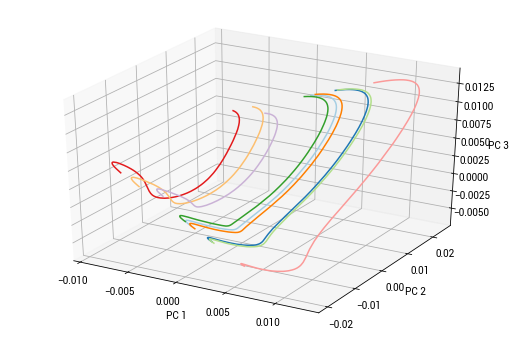

In [166]:
np.random.seed(0)
colours = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#FFFF99']

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
# Loop through trajectories and plot
for TbyCond, col in zip(mean_tchuncks, colours):
    ax.plot(TbyCond[:, 0], TbyCond[:, 1], TbyCond[:, 2], color=col)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

fig.savefig('Trial_projections.svg')

In [162]:
from matplotlib.lines import Line2D
from matplotlib.pyplot import *
import matplotlib.font_manager as fm
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
fm.fontManager.ttflist += fm.createFontList(['Roboto-Regular.ttf'])
matplotlib.rc('font', family='Roboto')

--2022-08-04 15:19:42--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2022-08-04 15:19:42--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
Saving to: ‘Roboto-Regular.ttf’

Roboto-Regular.ttf  100%[===================>] 141.94K  --.-KB/s    in 0.04s   

2022-08-04 15:19:42 (3.88 MB/s) - ‘Roboto-Regular.ttf’ saved [145348/145348]



In [146]:
# average across trial to clean up teh curves 
reshape_tchuncks = np.reshape(all_tchuncks,[n_conds,n_conds,T_NK.shape[0],n_components])
mean_tchuncks = np.mean(reshape_tchuncks,axis= 0)

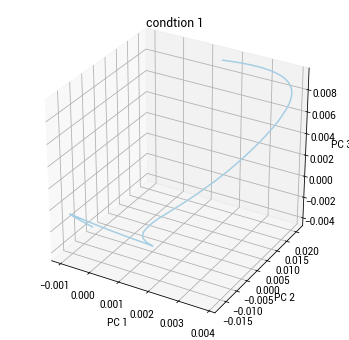

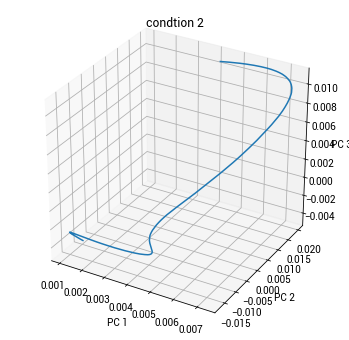

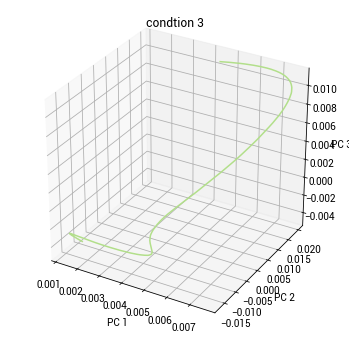

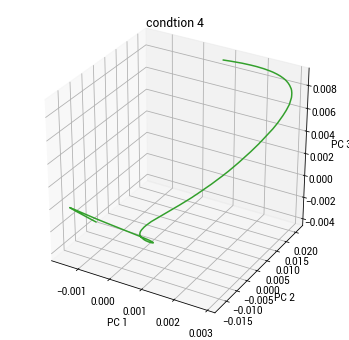

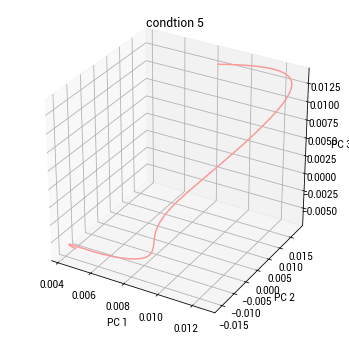

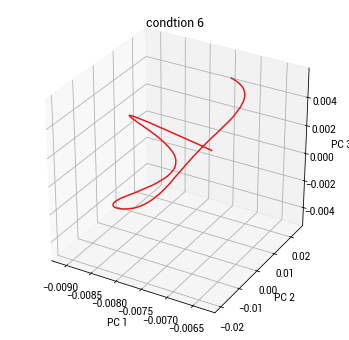

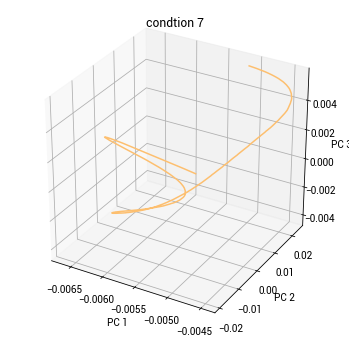

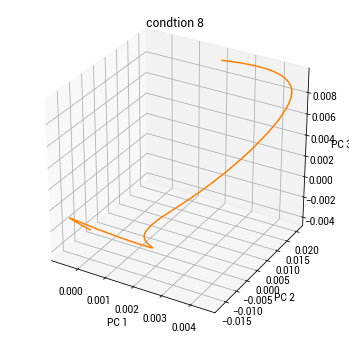

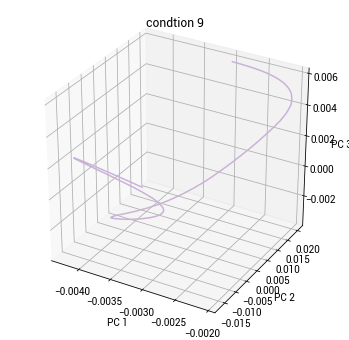

In [171]:
#colour code diff conditions and show the PC trajectories
#np.random.seed(2022)

colours = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#FFFF99']
# Loop through trajectories and plot
for i, (TbyCond, col) in enumerate(zip(mean_tchuncks, colours)):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    #plt.subplot(3,3,i+1)
    ax.plot(TbyCond[:, 0], TbyCond[:, 1], TbyCond[:, 2], color=col)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    plt.title('condtion %d' % (i+1))
    plt.show()
    fig.savefig('Trial_projections_individual%d.svg' % (i+1))

In [123]:
TbyCond[:, 0]

array([-0.00754248, -0.00752337, -0.007506  , ...,  0.        ,
        0.        ,  0.        ])

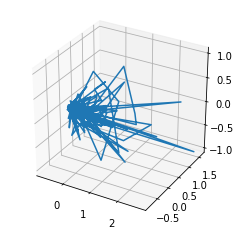

In [101]:
#time PC
pca = PCA(n_components=3)
T_pc = pca.fit_transform(reshape_T_NK)
#X_new = pca.inverse_transform(principalComponents)
#X_new = pca.inverse_transform(principalComponents)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = T_pc[:,0]
y = T_pc[:,1]
z = T_pc[:,2]
ax.plot(x,y,z)
plt.show()


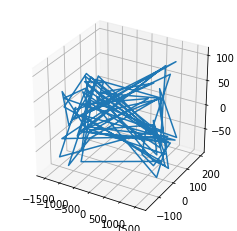

In [56]:
#behavioural PC

pca = PCA(n_components=3)
pos_pc = pca.fit_transform(pos[:,:,1])
#X_new = pca.inverse_transform(principalComponents)
#X_new = pca.inverse_transform(principalComponents)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = pos_pc[:,0]
y = pos_pc[:,1]
z = pos_pc[:,2]
ax.plot(x,y,z)
plt.show()

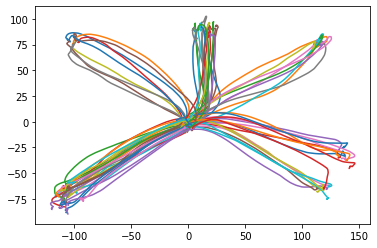

In [54]:
#plot all the hand trajectory, five reach directiosn hence five different neuron trajectories?? 
for i in range(pos.shape[0]):
  plt.plot(pos[i,:,0],pos[i,:,1])
plt.show()

In [95]:
this_index

[0, 8, 43, 45, 47, 61, 75, 77, 80]

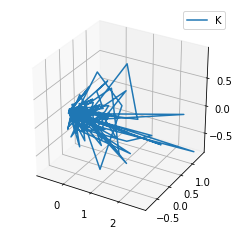

[[ 5.80389484e-03  5.80893824e-03  5.81380435e-03 ...  3.53378554e-03
   3.53017217e-03  3.52660703e-03]
 [ 3.19233541e-03  3.18617613e-03  3.18055915e-03 ...  7.28855671e-05
   6.64313314e-05  6.03469919e-05]
 [-6.35460388e-03 -6.38956652e-03 -6.42477647e-03 ...  5.29004294e-03
   5.28416892e-03  5.27743774e-03]]


In [95]:
#trial PC
pca = PCA(n_components=3)
K_pc = pca.fit_transform(reshape_K_NT)
#X_new = pca.inverse_transform(principalComponents)
#X_new = pca.inverse_transform(principalComponents)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = K_pc[:,0]
y = K_pc [:,1]
z = K_pc [:,2]
ax.plot(x,y,z)
plt.legend('K')
plt.show()
print(pca.components_)

In [194]:
indices[condKey[0]]

[14, 18, 25, 46, 49, 58, 59, 73]

NameError: ignored

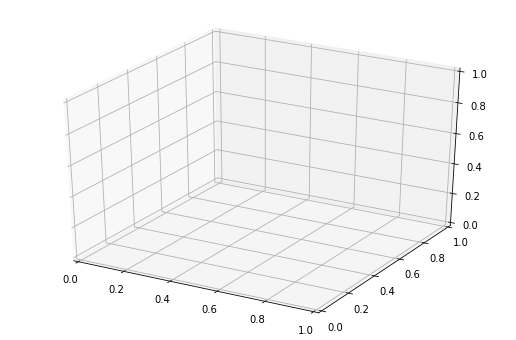

In [18]:
#make a functiuon that colour code teh trajectries by trial conditions 
#def colourTraj(data,trial_types,indices):
    # Plotting the 6 trial types as teh averaged traces, 
  # Seed generator for consistent plots
np.random.seed(2021)
colors = []
ratesdemo =[]
n_conds =len(trial_types)
condKey = list(indices.keys())
for i in np.random.choice(len(trial_types), len(trial_types)):
    cond = trial_types[i]
    
    this_index = indices[condKey[i]]
    trial_data = [K_NT[i] for i in this_index]
    colors.append(plt.cm.hsv(3 / (2*np.pi) + 0.5))
  # Stack data and apply PCA

# Loop through trajectories and plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for traj, col in zip(traj, colors):
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], color=col)
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2], color=col) 
a = trial_data[0,:]
b = trial_data[1,:]
c = trial_data[2,:]
ax.plot(a,b,c)
plt.legend('K')
plt.show()
# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


In [139]:
print(indices[i])

[1, 10, 24, 35, 39, 58, 59, 63, 69, 76, 88, 96, 99, 108, 119, 137, 145, 150, 171, 175, 185, 187, 195, 197, 201, 220, 226, 232]


<function matplotlib.pyplot.show>

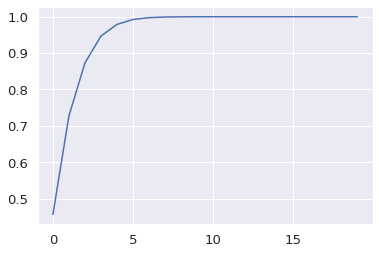

In [ ]:
# do it for the other as well
pca = PCA(n_components=20)
principalComponents = pca.fit(T_NK)

c_T_NK=np.array(pca.explained_variance_ratio_)
plt.plot(np.cumsum(c_T_NK)/np.sum(c_T_NK))

plt.show


<function matplotlib.pyplot.show>

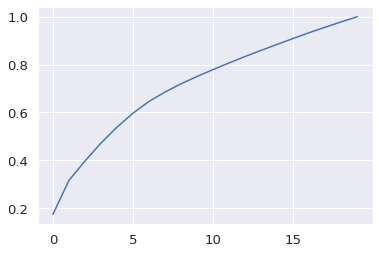

In [ ]:
# do it for the other as well
pca = PCA(n_components=20)
principalComponents = pca.fit(K_NT)
c_K_NT=np.array(pca.explained_variance_ratio_)
plt.plot(np.cumsum(c_K_NT)/np.sum(c_K_NT)) #variance explained as a fraction of the total variance as a function of the number of components
plt.show

In [ ]:
# Get the package for regression 
#!pip install Neural-Decoding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


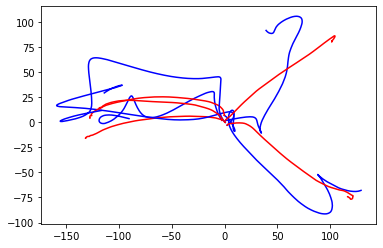

In [ ]:
# Regression with Kalman filter
from Neural_Decoding.decoders import KalmanFilterRegression

from sklearn.model_selection import train_test_split
# Do validation in 20% of trials
x_train, x_test, y_train, y_test = train_test_split(rates, pos, test_size=0.1)

#Test and train splits
kalman = KalmanFilterRegression()

kalman.fit(x_train.reshape(-1, x_train.shape[-1]),y_train.reshape(-1, y_train.shape[-1])) 

mse = [np.sqrt(np.mean((kalman.predict(x_test[n,:,:],y_test[n,:,:])-y_test)**2)) for n in range(y_test.shape[0])]
for n in range(5):
  y_p_test= kalman.predict(x_test[n,:,:],y_test[n,:,:])
  plt.plot(y_p_test[:,0],y_p_test[:,1],'b')
  plt.plot(y_test[n,:,0],y_test[n,:,1],'r')
#Fit to position from low-D version of neural activity

In [ ]:
# Do TCA 

#Install if new environment
!pip install git+https://github.com/ahwillia/tensortools

# Import tensortools
import tensortools as tt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ahwillia/tensortools to /tmp/pip-req-build-31ngpafb
  Running command git clone -q https://github.com/ahwillia/tensortools /tmp/pip-req-build-31ngpafb
  Created wheel for tensortools: filename=tensortools-0.3-py3-none-any.whl size=47993 sha256=5a44d5f39172873f1232b71ffd84e5cb493ac58fa84263ab8210409371283e83
  Stored in directory: /tmp/pip-ephem-wheel-cache-4zsi6tez/wheels/1c/a5/81/96b292bf9d9e3e00a29f59864a212f082de8221f254a82e159
Successfully built tensortools


In [ ]:
# Do TCA with ensemble method

# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(rates, ranks=range(1, 30), replicates=4) #Compute 30 components

Rank-1 models:  min obj, 0.67;  max obj, 0.67;  time to fit, 3.0s


Rank-2 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 6.8s


Rank-3 models:  min obj, 0.61;  max obj, 0.61;  time to fit, 6.4s


Rank-4 models:  min obj, 0.60;  max obj, 0.60;  time to fit, 9.3s


Rank-5 models:  min obj, 0.59;  max obj, 0.59;  time to fit, 11.9s


Rank-6 models:  min obj, 0.58;  max obj, 0.59;  time to fit, 10.8s


Rank-7 models:  min obj, 0.58;  max obj, 0.58;  time to fit, 19.7s


Rank-8 models:  min obj, 0.57;  max obj, 0.57;  time to fit, 13.4s


Rank-9 models:  min obj, 0.57;  max obj, 0.57;  time to fit, 15.7s


Rank-10 models:  min obj, 0.56;  max obj, 0.56;  time to fit, 17.8s


Rank-11 models:  min obj, 0.56;  max obj, 0.56;  time to fit, 16.1s


Rank-12 models:  min obj, 0.55;  max obj, 0.55;  time to fit, 15.8s


Rank-13 models:  min obj, 0.55;  max obj, 0.55;  time to fit, 16.3s


Rank-14 models:  min obj, 0.55;  max obj, 0.55;  time to fit, 28.2s


Rank-15 models:  min obj, 0.54;  max obj, 0.54;  time to fit, 20.5s


Rank-16 models:  min obj, 0.54;  max obj, 0.54;  time to fit, 24.0s


Rank-17 models:  min obj, 0.54;  max obj, 0.54;  time to fit, 24.3s


Rank-18 models:  min obj, 0.54;  max obj, 0.54;  time to fit, 26.5s


Rank-19 models:  min obj, 0.53;  max obj, 0.53;  time to fit, 31.2s


Rank-20 models:  min obj, 0.53;  max obj, 0.53;  time to fit, 26.4s


Rank-21 models:  min obj, 0.53;  max obj, 0.53;  time to fit, 28.1s


Rank-22 models:  min obj, 0.52;  max obj, 0.53;  time to fit, 33.2s


Rank-23 models:  min obj, 0.52;  max obj, 0.52;  time to fit, 38.3s


Rank-24 models:  min obj, 0.52;  max obj, 0.52;  time to fit, 45.8s


Rank-25 models:  min obj, 0.52;  max obj, 0.52;  time to fit, 36.9s


Rank-26 models:  min obj, 0.52;  max obj, 0.52;  time to fit, 42.0s


Rank-27 models:  min obj, 0.51;  max obj, 0.52;  time to fit, 38.9s


Rank-28 models:  min obj, 0.51;  max obj, 0.51;  time to fit, 35.8s


Rank-29 models:  min obj, 0.51;  max obj, 0.51;  time to fit, 36.0s


In [ ]:
# Save result from ensemble method

import pickle as pickle
import os

directory = os. getcwd()

file_name = os.path.join(directory,'result_ensemble.pickle')

with open(file_name, 'wb') as handle:
    pickle.dump(ensemble, handle)

In [ ]:
#Load results
import pickle as pickle
import os
import numpy as np
import matplotlib.pyplot as plt

directory = os. getcwd()

file_name = os.path.join(directory,'result_ensemble.pickle')
ensemble = pickle.load(open(file_name, "rb" ))

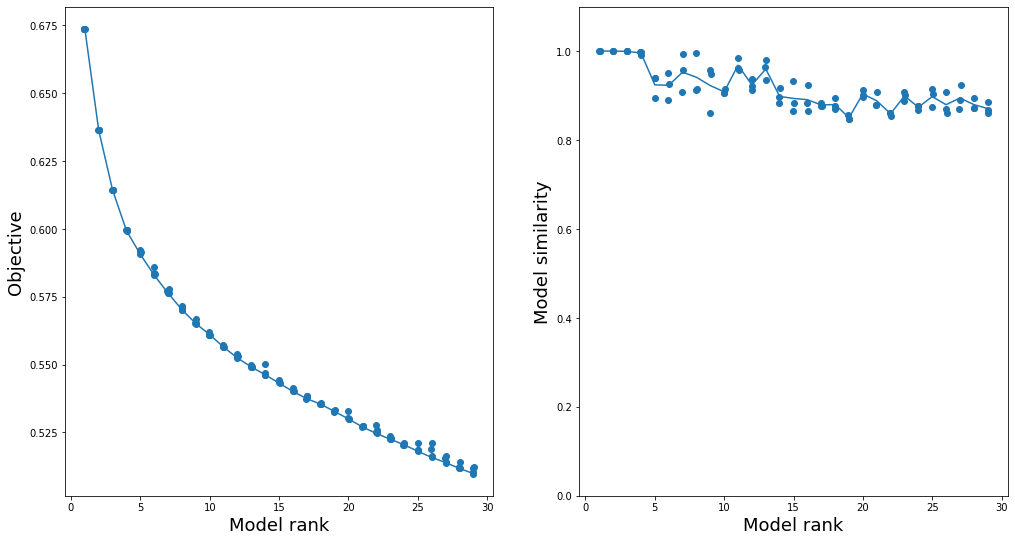

In [ ]:
# Plot ensemble method on NCP-Hals, similarity and reconstruction
from matplotlib.pyplot import *

plt.rcParams['font.sans-serif'] = 'Arial'
hfont = {'fontname':'Arial'}

fig, axes = plt.subplots(1, 2, figsize =[16.9, 9])
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
#fig.tight_layout()

axes[0].set_xlabel('Model rank',fontsize=18,**hfont)
axes[1].set_xlabel('Model rank',fontsize=18)
axes[0].set_ylabel('Objective',fontsize=18)
axes[1].set_ylabel('Model similarity',fontsize=18)

  
# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
#num_components = 2
#replicate = 0

#tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

In [ ]:
#Delay embedding

def embedding(vect,m,t_delay,fs):
    dla = int(np.round(t_delay*fs))
    mat = np.zeros([vect.size,m])
    for n in range(vect.size):
        if n>dla*m:
            mat[n,:] = np.flip(np.array([vect[n-l*dla] for l in range(m)]))
        else:
            n_delete = n
    mat = mat[n_delete+1:]
    return(mat)


In [ ]:
#Get the Trial-averaged system
rates_T_avg = np.mean(ensemble.factors(2)[0].full(),axis=0)

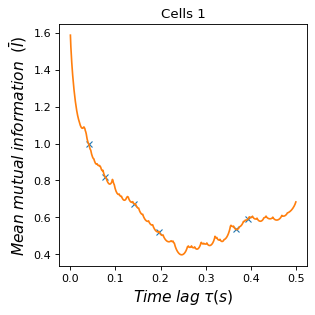

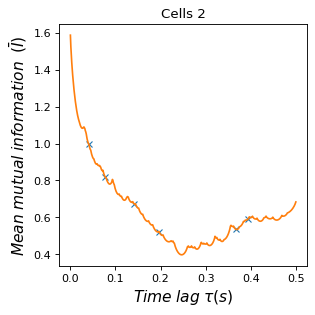

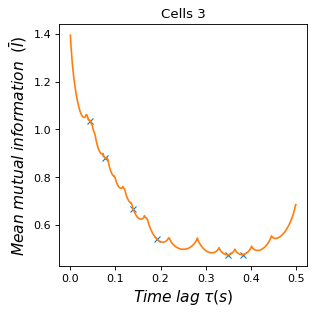

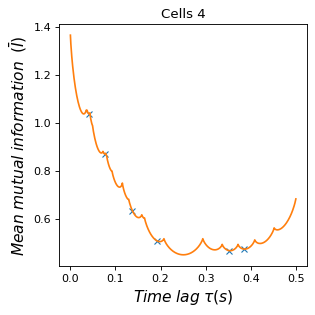

In [ ]:
from sklearn.metrics import mutual_info_score

#Mutual information with delay from zero padding
def mutual(x, mintau=0, maxtau=100, tlt='None', fs=1000):
    mtau = int(np.min([x.shape[0],maxtau*fs]))
    mintau = int(mintau*fs)
    mutuals = np.zeros(mtau-mintau)
    for tau in range(mintau,mtau):
        #Compute the histogram for the delay
        c_xy = np.histogram2d(np.pad(x,(0,mtau)), np.pad(x,(tau,mtau-tau)), 20)[0]
        mutuals[tau-mintau] = mutual_info_score(None,None,contingency=c_xy)
    
    taus = np.linspace(mintau/fs,mtau/fs,mtau-mintau)
    
    #Calculate AUC as criteria to define a good information point
    t_p = np.zeros_like(mutuals)
    
    #15,25,40, 50, 75 and 80% AUC as stopping criteria to define the delay
    
    thres =[0.15,0.25,0.4,0.5,0.75,0.80]
    candidates = np.zeros_like(thres)
    values = np.zeros_like(thres)
    cc = 0

    for i in range(mtau-mintau):
        if np.trapz(mutuals[:i])/np.trapz(mutuals)<=thres[cc]:
            candidates[cc] = taus[i]
            values[cc] = mutuals[i]
        elif cc<len(thres)-1:
            cc+=1
    plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(candidates,values,"x")
    plt.plot(taus,mutuals)
    plt.xlabel(r'$Time\;lag\;\tau(s)$',fontsize=14)
    plt.ylabel(r'$Mean\;mutual\;information\;\;(\bar{I})$',fontsize=14)
    plt.title(tlt)
    return candidates.tolist()

mut_7 = mutual(rates_T_avg[:,0],tlt='Cells 1')
mut_4 = mutual(rates_T_avg[:,1],tlt='Cells 2')
mut_5 = mutual(rates_T_avg[:,2],tlt='Cells 3')
mut_6 = mutual(rates_T_avg[:,3],tlt='Cells 4')

Text(0.5, 1.0, 'Candidates for cell 7')

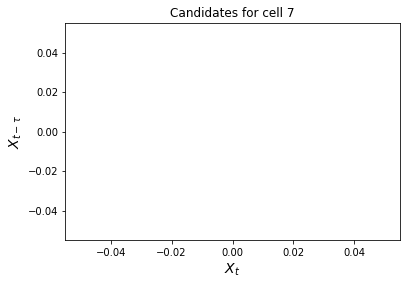

In [ ]:
for delay in [0.4]:
    mat = embedding(rates_T_avg[:,1],2,delay,1000)
    plt.plot(mat[:,0],mat[:,1])
plt.xlabel(r'$X_t$',fontsize=14)
plt.ylabel(r'$X_{t-\tau}$',fontsize=14)
plt.title('Candidates for cell 7')

In [ ]:
rates_T_avg.shape

(500, 162)